In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import datetime as dt
from numpy import mean
import math
from no_PII_Storage_folder import *
import matplotlib.pyplot as plt

In [2]:
user_data_org = pd.read_json('NewData/clickstream/sample_mitx_6002x_7_1t2017_log_data.json',  lines = True)

user_data = user_data_org
user_data['username'] = hash_column(user_data_org['username'])
# user_data.loc[0:3,]  #### get bunch of each row data

# print(user_data['username'])
# type(user_data['username'])
# username = user_data['username']


# print("Username Only\n",)
# print(username)
# username.value_counts(sort=True, ascending=True)

In [3]:
#Searches for mobile users and adds them to new data frame with ONLY mobile users

### Divide 'Mobile User' and 'Non Mobile User' // 'mobile_data'   ,  'Non_mobile_data'

keyword = "Mobi"

total_mobile = 0
total_non_mobile = 0

mobile_data = pd.DataFrame()
Non_mobile_data = pd.DataFrame()

for count in range(len(user_data)):
    if keyword in user_data['agent'][count]:
        mobile_data[total_mobile] = user_data.loc[count]
        total_mobile += 1
    else:
        Non_mobile_data[total_non_mobile] = user_data.loc[count]
        total_non_mobile += 1
        
print("\nThere are " + str(total_mobile) + " user-agents that contain:  " + keyword )  ### 87
print("\nThere are " + str(total_non_mobile) + " user-agents that not contain:  " + keyword)   ### 9913

mobile_data = mobile_data.T
Non_mobile_data = Non_mobile_data.T

#print(Non_mobile_data)



# Mobi ref : https://delib.zendesk.com/hc/en-us/articles/203431259-Browser-device-identification-how-to-find-out-which-browser-and-device-have-been-used-to-submit-a-response


There are 87 user-agents that contain:  Mobi

There are 9913 user-agents that not contain:  Mobi


In [4]:
Mobile_name_time_data = mobile_data[['username', 'time']]
Non_Mobile_name_time_data = Non_mobile_data[['username', 'time']]

#### We have to erase if there is '' and 'NaN' in the information 

Extract_Mobile_Dataframe = pd.DataFrame()
Extract_Non_Mobile_Dataframe = pd.DataFrame()


Total_Extract_Mobile = 0
Count_For_Mobile = 0

Total_Extract_Non_Mobile =0
Count_For_Non_Mobile = 0





for Count_For_Mobile in range(87):
    if( (Mobile_name_time_data['username'][Count_For_Mobile] != '' and Mobile_name_time_data['username'][Count_For_Mobile] != 'NA')):
        if((Mobile_name_time_data['time'][Count_For_Mobile] !='' and Mobile_name_time_data['time'][Count_For_Mobile] !='NA')):
            Extract_Mobile_Dataframe[Total_Extract_Mobile] = Mobile_name_time_data.loc[Count_For_Mobile]
            Total_Extract_Mobile = Total_Extract_Mobile + 1 
            
print(Extract_Mobile_Dataframe) 

for Count_For_Non_Mobile in range(9913):
    if( (Non_Mobile_name_time_data['username'][Count_For_Non_Mobile] != '' and Non_Mobile_name_time_data['username'][Count_For_Non_Mobile] != 'NA')):
        if((Non_Mobile_name_time_data['time'][Count_For_Non_Mobile] !='' and Non_Mobile_name_time_data['time'][Count_For_Non_Mobile] !='NA')):
            Extract_Non_Mobile_Dataframe[Total_Extract_Non_Mobile] = Non_Mobile_name_time_data.loc[Count_For_Non_Mobile]
            Total_Extract_Non_Mobile = Total_Extract_Non_Mobile + 1 
#     if(Count_For_Non_Mobile==9912):
#         break

print("Extract_Non_Mobile_Dataframe\n")
print(Extract_Non_Mobile_Dataframe)

Extract_Mobile_Dataframe = Extract_Mobile_Dataframe.T
Extract_Non_Mobile_Dataframe = Extract_Non_Mobile_Dataframe.T

print("Transpose_Extract_Mobile_Dataframe\n")
print(Extract_Mobile_Dataframe)

print("Transpose_Extract_Non_Mobile_Dataframe\n")
print(Extract_Non_Mobile_Dataframe)

# Extract_Mobile_Dataframe.value_counts(sort=True, ascending=True)
# Extract_Non_Mobile_Dataframe.value_counts(sort=True, ascending=True)



                                        0                                 1   \
username  1fc8371d6fb5d841af64503da54e4ec4  aa75ce9861e361e2201c070fee4876ae   
time        2017-03-27 16:21:54.930867 UTC    2017-03-27 12:55:42.111315 UTC   

                                        2                                 3   \
username  f7c9b5ba8e176a40998faa3874f04378  f7c9b5ba8e176a40998faa3874f04378   
time        2017-03-27 19:03:01.540341 UTC    2017-03-27 18:54:05.892719 UTC   

                                        4                                 5   \
username  b3f3085d31e232ce60b89a562398a25f  4753bd3ceb797e82aabe1addef241d4e   
time        2017-03-27 21:12:43.481938 UTC    2017-03-27 17:55:48.382141 UTC   

                                        6                                 7   \
username  d39491d5e973c40e3b1e5957cce823ee  6e1b401adef4664bbc5b17f8bbbb4c3f   
time        2017-03-27 06:05:01.180714 UTC    2017-03-27 08:12:37.832547 UTC   

                                    

In [5]:
##### Here part is for groupby ####

Extract_Mobile_Dataframe = Extract_Mobile_Dataframe.sort_values(['time'], ascending=True)  ## Sorting time before group by
Grouped_Mobile_Dataframe = Extract_Mobile_Dataframe.groupby('username')

for key, group in Grouped_Mobile_Dataframe:
    print(" key: ", key)
    print(" count: ", len(group))
    print(group.head())
    print("\n")

List_Mobile_Keys = list(Grouped_Mobile_Dataframe.groups.keys())
print("List_Mobile_Keys\n")
print(List_Mobile_Keys)
print(len(List_Mobile_Keys))  ### There are 12 unique keys in here == There are 12 unique users for Mobile Users

print("Print Here\n")

Mobile_Group0 = Grouped_Mobile_Dataframe.get_group(List_Mobile_Keys[0])

print("Mobile_Group0\n")
print(Mobile_Group0)
print("Can I print out the len of the Group0?\n")
print(len(Mobile_Group0))   ### We can get the number of click


print("Type of it!\n")
print(type(Mobile_Group0))  #### <class 'pandas.core.frame.DataFrame'>

print(Mobile_Group0['time'].iloc[0])
print(Mobile_Group0['time'].iloc[1])


##### Just want to see how may   --> We can just ignore it

Grouped_Mobile_Dataframe_count = Grouped_Mobile_Dataframe.count()
print(Grouped_Mobile_Dataframe_count)    ##### It will show how many times does each user click it. Left: usernaem  Right: how many times do they click for it
type(Grouped_Mobile_Dataframe_count)  ### It was Dataframe 

print(Grouped_Mobile_Dataframe_count.iloc[0][0])   #### We can get only the click number of first user : 10
print(Grouped_Mobile_Dataframe_count.iloc[1][0])   #### We can get only the click number of second user : 2

print("Only the click time\n")
click_time_Mobile = Grouped_Mobile_Dataframe_count.iloc[:,0]
print(click_time_Mobile[0]) # We can get only the click number of first user : 10
print(type(click_time_Mobile))  # <class 'pandas.core.series.Series'>
print(type(click_time_Mobile[0]))  # <class 'numpy.int64'>
#### Actually there are 12 unique users for Mobile users.


############################################################### Okay Let's get it!!!##########################

#### I did it depend on "List_Mobile_Keys" sequence. This sequence is the order of group name(=user)
datetimeFormat = '%Y-%m-%d %H:%M:%S.%f %Z'

Full_time_diff_Mobile_List = []
time_diff_Mobile_List = []
Plot_time_diff_Mobile_List = []   #### Use this list when we are plot a histogram

for i in range(len(List_Mobile_Keys)):  ### Loop for how many groups (= how many unique users)
    time_diff_Mobile_List = []
    Mobile_Group = Grouped_Mobile_Dataframe.get_group(List_Mobile_Keys[i])  ## i th Group
    for j in range(len(Mobile_Group)-1):  ### Loop for how many click times for each i th Group  // It is the time difference so we need to do -1
        time_diff_Mobile = datetime.datetime.strptime(Mobile_Group['time'].iloc[j+1], datetimeFormat)-datetime.datetime.strptime(Mobile_Group['time'].iloc[j],datetimeFormat)
        #time_diff_Mobile_List.append(time_diff_Mobile)
        time_diff_Mobile_List.append(time_diff_Mobile.total_seconds())
        Plot_time_diff_Mobile_List.append(time_diff_Mobile.total_seconds())
        
    print("This is for Group : ", i)
    print(time_diff_Mobile_List)
    print("The length of the click_diff time for this Group is :")
    print(len(time_diff_Mobile_List))
#    Full_time_diff_Mobile_List.append(time_diff_Mobile_List)
    Full_time_diff_Mobile_List.append(round(np.mean(time_diff_Mobile_List),2))

print("This is for the full time difference for Mobile User\n")
print(Full_time_diff_Mobile_List)

print("The number of Group is \n")
print(len(Full_time_diff_Mobile_List))  # 12

print("The average of Full_time_diff_Mobile_List\n")
print(np.mean(Full_time_diff_Mobile_List))

print("This is the list for plot\n")
print(Plot_time_diff_Mobile_List)

print("The length of the list for plot is : ")
print(len(Plot_time_diff_Mobile_List))

print("What is the max time_diff in Mobile User?\n")
print(max(Plot_time_diff_Mobile_List))
print(min(Plot_time_diff_Mobile_List))
print(np.mean(Plot_time_diff_Mobile_List))

#print(type(Full_time_diff_Mobile_List[0][0]))    #  <class 'float'>






 key:  1fc8371d6fb5d841af64503da54e4ec4
 count:  10
                            username                            time
9   1fc8371d6fb5d841af64503da54e4ec4  2017-03-27 16:18:43.330044 UTC
49  1fc8371d6fb5d841af64503da54e4ec4  2017-03-27 16:18:44.759648 UTC
32  1fc8371d6fb5d841af64503da54e4ec4  2017-03-27 16:19:06.958719 UTC
44  1fc8371d6fb5d841af64503da54e4ec4  2017-03-27 16:19:08.149776 UTC
33  1fc8371d6fb5d841af64503da54e4ec4  2017-03-27 16:19:16.338052 UTC


 key:  2f8d11e99f6dcb34ba9202fa371e9129
 count:  2
                            username                            time
20  2f8d11e99f6dcb34ba9202fa371e9129  2017-03-27 21:21:53.844085 UTC
58  2f8d11e99f6dcb34ba9202fa371e9129   2017-03-27 21:21:54.77404 UTC


 key:  4753bd3ceb797e82aabe1addef241d4e
 count:  4
                            username                            time
38  4753bd3ceb797e82aabe1addef241d4e  2017-03-27 17:55:38.108021 UTC
48  4753bd3ceb797e82aabe1addef241d4e  2017-03-27 17:55:39.293972 UTC
5   4753bd3ceb

In [6]:
##### Here is for the Non_Mobile_User  ######


Extract_Non_Mobile_Dataframe = Extract_Non_Mobile_Dataframe.sort_values(['time'], ascending=True)    
Grouped_Non_Mobile_Dataframe = Extract_Non_Mobile_Dataframe.groupby('username')

for key_n, group_n in Grouped_Non_Mobile_Dataframe:
    print(" key: ", key_n)
    print(" count: ", len(group_n))
    print(group_n.head())
    print("\n")

######## Copy from the Mobile Things ######

List_Non_Mobile_Keys = list(Grouped_Non_Mobile_Dataframe.groups.keys())
print("List__Non_Mobile_Keys\n")
print(List_Non_Mobile_Keys)
print(len(List_Non_Mobile_Keys))  ### There are 499 unique keys in here == There are 499 unique users for Non Mobile Users

print("Print Here\n")

Mobile_Non_Group0 = Grouped_Non_Mobile_Dataframe.get_group(List_Non_Mobile_Keys[0])

print("Mobile_Non_Group0\n")
print(Mobile_Non_Group0)
print("Can I print out the len of the Group0?\n")
print(len(Mobile_Non_Group0))   ### We can get the number of click


print("Type of it!\n")
print(type(Mobile_Non_Group0))  #### <class 'pandas.core.frame.DataFrame'>

print(Mobile_Non_Group0['time'].iloc[0])
print(Mobile_Non_Group0['time'].iloc[1])


##### Just want to see how may   --> We can just ignore it

Grouped_Non_Mobile_Dataframe_count = Grouped_Non_Mobile_Dataframe.count()
print(Grouped_Non_Mobile_Dataframe_count)    ##### It will show how many times does each user click it. Left: usernaem  Right: how many times do they click for it
type(Grouped_Non_Mobile_Dataframe_count)  ### It was Dataframe 


print("Only the click time\n")
click_time_Non_Mobile = Grouped_Non_Mobile_Dataframe_count.iloc[:,0]
print(click_time_Non_Mobile[0]) # We can get only the click number of first user 
print(type(click_time_Non_Mobile))  # <class 'pandas.core.series.Series'>
print(type(click_time_Non_Mobile[0]))  # <class 'numpy.int64'>
#### Actually there are 499 unique users for Non Mobile users.


############################################################### Okay Let's get it!!!##########################

#### I did it depend on "List_Non_Mobile_Keys" sequence. This sequence is the order of group name(=user)
datetimeFormat = '%Y-%m-%d %H:%M:%S.%f %Z'

Full_time_diff_Non_Mobile_List = []
time_diff_Non_Mobile_List = []
Plot_time_diff_Non_Mobile_List = []   #### Use this list when we are plot a histogram
count_Nan = 0

for i in range(len(List_Non_Mobile_Keys)):  ### Loop for how many groups (= how many unique users)
    time_diff_Non_Mobile_List = []
    Non_Mobile_Group = Grouped_Non_Mobile_Dataframe.get_group(List_Non_Mobile_Keys[i])  ## i th Group
    
    if(len(Non_Mobile_Group)!=1):
        for j in range(len(Non_Mobile_Group)-1):  ### Loop for how many click times for each i th Group  // It is the time difference so we need to do -1
            time_diff_Non_Mobile = datetime.datetime.strptime(Non_Mobile_Group['time'].iloc[j+1], datetimeFormat)-datetime.datetime.strptime(Non_Mobile_Group['time'].iloc[j],datetimeFormat)
            #time_diff_Mobile_List.append(time_diff_Mobile)
            time_diff_Non_Mobile_List.append(time_diff_Non_Mobile.total_seconds())
            Plot_time_diff_Non_Mobile_List.append(time_diff_Non_Mobile.total_seconds())
            
        print("This is for Group : ", i)
        print(time_diff_Non_Mobile_List)
        print("The length of the click_diff time for this Group is :")
        print(len(time_diff_Non_Mobile_List))

        Full_time_diff_Non_Mobile_List.append(round(np.mean(time_diff_Non_Mobile_List),2))

print("This is for the full time difference for Non Mobile User\n")
print(Full_time_diff_Non_Mobile_List)

print("The number of Group is \n")
print(len(Full_time_diff_Non_Mobile_List))  

print("Count Nan!\n")
print(count_Nan)

print("The average of Full_time_Non_diff_Mobile_List\n")
print(np.mean(Full_time_diff_Non_Mobile_List))

print("This is the list for plot\n")
print(Plot_time_diff_Non_Mobile_List)

print("The length of the list for plot is : ")
print(len(Plot_time_diff_Non_Mobile_List))

print(max(Plot_time_diff_Non_Mobile_List))   ####   7915.878822
print(min(Plot_time_diff_Non_Mobile_List))   #### 0.40413
print(np.mean(Plot_time_diff_Non_Mobile_List))   #### 150.69344390666666


 key:  00695a96f48482a903f6d34af38a6ebc
 count:  12
                              username                            time
3701  00695a96f48482a903f6d34af38a6ebc  2017-03-27 10:30:31.960686 UTC
5775  00695a96f48482a903f6d34af38a6ebc   2017-03-27 10:30:33.18271 UTC
3363  00695a96f48482a903f6d34af38a6ebc  2017-03-27 10:32:35.360297 UTC
8280  00695a96f48482a903f6d34af38a6ebc   2017-03-27 10:32:36.36021 UTC
3192  00695a96f48482a903f6d34af38a6ebc  2017-03-27 10:35:25.555338 UTC


 key:  009d54c37ed07a5d595974ce14757a16
 count:  8
                              username                            time
312   009d54c37ed07a5d595974ce14757a16  2017-03-27 21:02:32.063258 UTC
7501  009d54c37ed07a5d595974ce14757a16  2017-03-27 21:02:32.811303 UTC
1742  009d54c37ed07a5d595974ce14757a16  2017-03-27 23:26:11.524812 UTC
6512  009d54c37ed07a5d595974ce14757a16  2017-03-27 23:26:12.159459 UTC
1242  009d54c37ed07a5d595974ce14757a16  2017-03-27 23:37:03.981744 UTC


 key:  01b4e00efff67c2ed4dc619c5b2321c6
 

 count:  2
                              username                            time
2081  15c62dc3c0d7e37d68262052c0edcb91  2017-03-27 17:21:53.231879 UTC
7274  15c62dc3c0d7e37d68262052c0edcb91  2017-03-27 17:21:54.326725 UTC


 key:  164e2bb9678796ab0bd5f10bfc3c42e0
 count:  6
                              username                            time
1857  164e2bb9678796ab0bd5f10bfc3c42e0  2017-03-27 16:43:55.167633 UTC
5349  164e2bb9678796ab0bd5f10bfc3c42e0  2017-03-27 16:43:55.808248 UTC
1162  164e2bb9678796ab0bd5f10bfc3c42e0  2017-03-27 16:50:45.794744 UTC
5861  164e2bb9678796ab0bd5f10bfc3c42e0  2017-03-27 16:50:46.492453 UTC
646   164e2bb9678796ab0bd5f10bfc3c42e0  2017-03-27 16:51:02.005261 UTC


 key:  16f8b1ea91a4cc17f47457b905f8986f
 count:  14
                              username                            time
936   16f8b1ea91a4cc17f47457b905f8986f  2017-03-27 00:27:20.711563 UTC
8458  16f8b1ea91a4cc17f47457b905f8986f  2017-03-27 00:27:22.106542 UTC
772   16f8b1ea91a4cc17f47457b9

                              username                            time
3534  3216e8acc8eb640be2a32cb6e4e0abc3  2017-03-27 10:30:44.930585 UTC
7319  3216e8acc8eb640be2a32cb6e4e0abc3  2017-03-27 10:30:45.784298 UTC
2207  3216e8acc8eb640be2a32cb6e4e0abc3  2017-03-27 10:31:55.620817 UTC
7062  3216e8acc8eb640be2a32cb6e4e0abc3  2017-03-27 10:31:56.366292 UTC
3625  3216e8acc8eb640be2a32cb6e4e0abc3  2017-03-27 10:32:12.079078 UTC


 key:  323ba338d53c0a1adb18b81ee519587a
 count:  12
                              username                            time
2026  323ba338d53c0a1adb18b81ee519587a  2017-03-27 12:54:07.297329 UTC
5929  323ba338d53c0a1adb18b81ee519587a  2017-03-27 12:54:09.060302 UTC
556   323ba338d53c0a1adb18b81ee519587a  2017-03-27 12:54:39.514976 UTC
4885  323ba338d53c0a1adb18b81ee519587a  2017-03-27 12:54:40.408239 UTC
2014  323ba338d53c0a1adb18b81ee519587a   2017-03-27 13:20:24.97152 UTC


 key:  324eb80145d112821724fb8c8fad6940
 count:  2
                              username   

                              username                            time
3766  4830debff710ab3afbf29fed9c8c3887  2017-03-27 19:51:54.780482 UTC
7817  4830debff710ab3afbf29fed9c8c3887  2017-03-27 19:51:55.516273 UTC


 key:  4833623f8d9a1fb40fe41ce3ad514846
 count:  46
                              username                            time
1839  4833623f8d9a1fb40fe41ce3ad514846  2017-03-27 15:58:40.828183 UTC
8016  4833623f8d9a1fb40fe41ce3ad514846  2017-03-27 15:58:41.177306 UTC
3525  4833623f8d9a1fb40fe41ce3ad514846  2017-03-27 16:24:20.834187 UTC
7404  4833623f8d9a1fb40fe41ce3ad514846  2017-03-27 16:24:21.669007 UTC
2204  4833623f8d9a1fb40fe41ce3ad514846  2017-03-27 16:45:36.294827 UTC


 key:  489fae57e1724b1037ba13e03e22f93d
 count:  4
                              username                            time
2007  489fae57e1724b1037ba13e03e22f93d  2017-03-27 12:26:12.557876 UTC
6061  489fae57e1724b1037ba13e03e22f93d  2017-03-27 12:26:13.681018 UTC
670   489fae57e1724b1037ba13e03e22f93d  2

                              username                            time
4143  5fee7fa87770fed41d07d4b6656ab235  2017-03-27 00:56:26.800317 UTC
7333  5fee7fa87770fed41d07d4b6656ab235  2017-03-27 00:56:27.662153 UTC
771   5fee7fa87770fed41d07d4b6656ab235  2017-03-27 00:58:00.501969 UTC
6732  5fee7fa87770fed41d07d4b6656ab235   2017-03-27 00:58:01.20495 UTC


 key:  6004a4280085ad4252c9ab654633cda3
 count:  12
                              username                            time
1683  6004a4280085ad4252c9ab654633cda3  2017-03-27 02:08:45.226254 UTC
6809  6004a4280085ad4252c9ab654633cda3  2017-03-27 02:08:46.387593 UTC
462   6004a4280085ad4252c9ab654633cda3   2017-03-27 02:47:20.89842 UTC
7551  6004a4280085ad4252c9ab654633cda3  2017-03-27 02:47:21.984545 UTC
2435  6004a4280085ad4252c9ab654633cda3  2017-03-27 03:04:26.285308 UTC


 key:  6007a72140b0e73cfd24dc047ab8ba96
 count:  10
                              username                            time
3493  6007a72140b0e73cfd24dc047ab8ba96  



 key:  76e7f8f2ebf0e867467927a8b8e442f1
 count:  6
                              username                            time
153   76e7f8f2ebf0e867467927a8b8e442f1  2017-03-27 21:15:21.049452 UTC
6651  76e7f8f2ebf0e867467927a8b8e442f1   2017-03-27 21:15:22.08512 UTC
1548  76e7f8f2ebf0e867467927a8b8e442f1  2017-03-27 21:16:24.475346 UTC
5015  76e7f8f2ebf0e867467927a8b8e442f1  2017-03-27 21:16:25.644034 UTC
1865  76e7f8f2ebf0e867467927a8b8e442f1  2017-03-27 21:20:48.237764 UTC


 key:  76e94f000366868e3bb11477a4292080
 count:  10
                              username                            time
859   76e94f000366868e3bb11477a4292080  2017-03-27 16:13:47.559049 UTC
7599  76e94f000366868e3bb11477a4292080  2017-03-27 16:13:47.955093 UTC
2874  76e94f000366868e3bb11477a4292080  2017-03-27 16:14:00.452873 UTC
4585  76e94f000366868e3bb11477a4292080  2017-03-27 16:14:00.737456 UTC
690   76e94f000366868e3bb11477a4292080  2017-03-27 17:17:13.977963 UTC


 key:  77718742fdfd0f1a8c81fc95108d9fbd

                              username                            time
1739  8d51b7c6d4ab0de7055136625a8d5fed  2017-03-27 11:30:25.342303 UTC
5499  8d51b7c6d4ab0de7055136625a8d5fed  2017-03-27 11:30:26.056829 UTC
1661  8d51b7c6d4ab0de7055136625a8d5fed  2017-03-27 11:32:56.137717 UTC
7477  8d51b7c6d4ab0de7055136625a8d5fed  2017-03-27 11:32:56.706394 UTC
4029  8d51b7c6d4ab0de7055136625a8d5fed  2017-03-27 11:33:00.478062 UTC


 key:  8e01ed2eb3bd12113efaaffdf0290a65
 count:  16
                              username                            time
3820  8e01ed2eb3bd12113efaaffdf0290a65  2017-03-27 21:35:18.257273 UTC
8077  8e01ed2eb3bd12113efaaffdf0290a65  2017-03-27 21:35:19.132307 UTC
702   8e01ed2eb3bd12113efaaffdf0290a65  2017-03-27 22:04:41.796795 UTC
6925  8e01ed2eb3bd12113efaaffdf0290a65  2017-03-27 22:04:43.100295 UTC
520   8e01ed2eb3bd12113efaaffdf0290a65  2017-03-27 22:06:16.053246 UTC


 key:  8e17b6a079ee062f79cb6aff4661f160
 count:  6
                              username   

                              username                            time
3049  a6a180679fadecd142fe96442d77519f  2017-03-27 02:46:29.584634 UTC
7682  a6a180679fadecd142fe96442d77519f  2017-03-27 02:46:30.849047 UTC


 key:  a6a24d9803d51cd61afff221b407e821
 count:  34
                              username                            time
2064  a6a24d9803d51cd61afff221b407e821  2017-03-27 16:08:53.703739 UTC
8723  a6a24d9803d51cd61afff221b407e821  2017-03-27 16:08:54.419177 UTC
1279  a6a24d9803d51cd61afff221b407e821  2017-03-27 16:14:27.536275 UTC
5190  a6a24d9803d51cd61afff221b407e821  2017-03-27 16:14:28.257911 UTC
2969  a6a24d9803d51cd61afff221b407e821  2017-03-27 16:14:53.200535 UTC


 key:  a6e81b76f81bf7b1062cec8cb8f39937
 count:  28
                              username                            time
3515  a6e81b76f81bf7b1062cec8cb8f39937    2017-03-27 00:29:45.1671 UTC
8596  a6e81b76f81bf7b1062cec8cb8f39937  2017-03-27 00:29:45.977449 UTC
2389  a6e81b76f81bf7b1062cec8cb8f39937  

                              username                            time
1603  bff5ac1120f4d3bcc41cc7adbd6eecc4  2017-03-27 01:15:58.186642 UTC
8203  bff5ac1120f4d3bcc41cc7adbd6eecc4  2017-03-27 01:15:59.020745 UTC
7818  bff5ac1120f4d3bcc41cc7adbd6eecc4  2017-03-27 01:23:25.953599 UTC
3424  bff5ac1120f4d3bcc41cc7adbd6eecc4  2017-03-27 01:23:26.277975 UTC
1922  bff5ac1120f4d3bcc41cc7adbd6eecc4  2017-03-27 01:25:39.804711 UTC


 key:  c0bf93c9d8daaaeb4268ad6cab64dae5
 count:  2
                              username                            time
2521  c0bf93c9d8daaaeb4268ad6cab64dae5  2017-03-27 12:17:31.474408 UTC
4781  c0bf93c9d8daaaeb4268ad6cab64dae5  2017-03-27 12:17:32.547562 UTC


 key:  c185d66e82fa3fc80948c889bb726427
 count:  12
                              username                            time
4060  c185d66e82fa3fc80948c889bb726427  2017-03-27 14:17:34.477433 UTC
5628  c185d66e82fa3fc80948c889bb726427   2017-03-27 14:17:35.34219 UTC
34    c185d66e82fa3fc80948c889bb726427  2

                              username                            time
3947  db039cfaf7b7bc7ded2b779416756dce  2017-03-27 18:22:59.194849 UTC
7937  db039cfaf7b7bc7ded2b779416756dce  2017-03-27 18:23:00.138289 UTC
3351  db039cfaf7b7bc7ded2b779416756dce  2017-03-27 18:23:27.921487 UTC
7309  db039cfaf7b7bc7ded2b779416756dce  2017-03-27 18:23:28.659057 UTC
2279  db039cfaf7b7bc7ded2b779416756dce  2017-03-27 18:23:45.982345 UTC


 key:  dbb3d9addb56a368a1d58e08e5764747
 count:  48
                              username                            time
628   dbb3d9addb56a368a1d58e08e5764747  2017-03-27 14:48:01.475821 UTC
7374  dbb3d9addb56a368a1d58e08e5764747  2017-03-27 14:48:02.307761 UTC
3420  dbb3d9addb56a368a1d58e08e5764747  2017-03-27 14:49:26.378603 UTC
7809  dbb3d9addb56a368a1d58e08e5764747  2017-03-27 14:49:27.260911 UTC
2421  dbb3d9addb56a368a1d58e08e5764747  2017-03-27 14:53:37.403145 UTC


 key:  dc4d72917478484695928f98062a7d78
 count:  10
                              username  

                              username                            time
1778  f77cdc81b06db4958d9e3950b3a5a98e  2017-03-27 01:46:38.251934 UTC
6451  f77cdc81b06db4958d9e3950b3a5a98e  2017-03-27 01:46:39.076584 UTC
69    f77cdc81b06db4958d9e3950b3a5a98e  2017-03-27 01:47:38.285775 UTC
5535  f77cdc81b06db4958d9e3950b3a5a98e  2017-03-27 01:47:39.887086 UTC
4055  f77cdc81b06db4958d9e3950b3a5a98e  2017-03-27 01:47:43.484705 UTC


 key:  f86ad309f29143af1be6be6f9fd80cc9
 count:  8
                              username                            time
3899  f86ad309f29143af1be6be6f9fd80cc9  2017-03-27 21:12:31.846755 UTC
7779  f86ad309f29143af1be6be6f9fd80cc9  2017-03-27 21:12:32.625916 UTC
3285  f86ad309f29143af1be6be6f9fd80cc9  2017-03-27 21:44:47.543095 UTC
4645  f86ad309f29143af1be6be6f9fd80cc9  2017-03-27 21:44:48.158638 UTC
4304  f86ad309f29143af1be6be6f9fd80cc9  2017-03-27 21:46:50.117238 UTC


 key:  f86e78f920114c3164d2915964ec670b
 count:  8
                              username    

This is for Group :  44
[0.575085, 6.478884, 0.566697, 1194.30817, 0.50352, 31.719358, 0.464675, 2.029217, 0.496899, 1900.693697, 0.797641, 142.193735, 0.868557, 119.493838, 0.695202, 1963.210774, 0.802446, 14.56393, 0.752486, 15.187395, 0.79067, 17.606134, 0.680951, 3.872984, 0.663611, 40.101367, 0.829889, 212.833894, 0.90942, 13.428086, 0.878646, 8.183334, 0.845852, 43.738511, 1.099597, 464.857125, 0.684653, 50.325071, 0.890352, 68.354019, 0.842968, 3.447106, 0.673845, 299.163594, 0.634422, 615.270783, 1.064948, 5.578758, 1.589844, 199.530115, 0.998828, 277.597069, 1.151477, 346.362152, 1.447864, 49.457992, 1.583476, 67.990196, 1.241041, 129.864987, 0.339924, 8.978529, 1.266353, 153.074023, 0.635866, 7.259831, 1.361582, 109.648163, 1.442953, 903.509079, 0.666329, 30.557595, 0.474039, 8.744625, 1.010491, 11.324242, 0.713822, 945.311945, 0.701955, 144.6213, 0.784021, 98.040711, 0.896572, 14572.58862, 1.467542, 33.122612, 0.866575, 14.647297, 0.818765, 63.235504, 2.179591, 143.568024, 0

The length of the click_diff time for this Group is :
12
This is for Group :  137
[0.780999]
The length of the click_diff time for this Group is :
1
This is for Group :  138
[0.692733, 5538.017417, 0.334406, 28.938808, 0.732047, 15934.293502, 0.493756, 1769.288242, 0.542664]
The length of the click_diff time for this Group is :
9
This is for Group :  139
[0.868679]
The length of the click_diff time for this Group is :
1
This is for Group :  140
[0.825197, 25.759539, 0.598517]
The length of the click_diff time for this Group is :
3
This is for Group :  141
[1.169956, 180.864784, 1.389682]
The length of the click_diff time for this Group is :
3
This is for Group :  142
[0.623655, 104.361306, 0.432515, 92.39984, 0.299413]
The length of the click_diff time for this Group is :
5
This is for Group :  143
[0.558113, 170.822572, 0.523429, 88.37476, 0.954051, 794.277122, 1.112806, 4637.330254, 0.598585, 1976.428531, 1.153424, 5832.712442, 0.936571, 345.325494, 0.479543, 40.408689, 0.431257, 18.

The length of the click_diff time for this Group is :
21
This is for Group :  224
[0.735791]
The length of the click_diff time for this Group is :
1
This is for Group :  225
[0.874552, 266.328986, 1.008141, 2328.494524, 0.776285, 195.644504, 0.774212, 24.954254, 0.526483, 148.12449, 0.72121, 229.156897, 0.521348, 70.193009, 0.487521, 40.767317, 0.527111, 117.853763, 0.513824, 31.953833, 0.497531]
The length of the click_diff time for this Group is :
21
This is for Group :  226
[16.119608]
The length of the click_diff time for this Group is :
1
This is for Group :  227
[0.724295, 93.034924, 0.714354, 10259.783541, 2.313461, 0.743324, 37.191203, 214.604516, 1.602022, 0.936597, 37931.809115]
The length of the click_diff time for this Group is :
11
This is for Group :  228
[1.13351, 61.334385, 1.902799, 8119.042849, 1.198374]
The length of the click_diff time for this Group is :
5
This is for Group :  229
[0.833488, 12.499214, 0.74004, 70.869009, 0.54805, 8.833991, 0.748568]
The length of 

This is for Group :  291
[0.831063, 33.922039, 0.848337, 13602.0849, 1.040585, 428.917412, 0.620342, 9.063423, 0.615285, 13.990538, 0.620378, 13588.639917, 3.495743, 59.699089, 0.915476, 5.657318, 0.748597, 269.969402, 0.272797, 129.550346, 0.849558, 1216.692962, 0.899425, 520.382699, 1.09194, 292.905581, 1.289815, 198.542409, 1.728453, 204.061333, 1.086202, 1356.620936, 2.47848, 47.561141, 1.505652, 104.699006, 1.167123, 395.4235, 0.156618, 151.590088, 1.43072, 12.481738, 0.82304, 33.003627, 0.630096, 216.645285, 0.773019, 32095.998615, 0.518425, 58.129344, 0.491964, 32.41596, 0.512764, 1529.293028, 0.637886, 934.136557, 0.504755]
The length of the click_diff time for this Group is :
57
This is for Group :  292
[1.017812, 26.620212, 1.111153, 1807.364415, 1.108704, 51.006983, 1.483576, 229.298745, 1.139066, 803.659411, 1.089499, 105.955108, 0.606233, 8.261421, 1.125594, 6.204151, 0.570867, 452.724475, 1.000494, 33.7224, 0.617984, 4.604868, 0.618457, 127.75781, 1.046628, 16.23815, 0.88

This is for Group :  366
[9425804.363644, 50.866076, 1.152695, 28.628527, 41.32958, 32.308577, 67.536045, 37.445842, 72.567763, 77.124535, 13.190095, 31.556478, 94.679115, 109.843728, 114.334646, 84.991343, 57.561209, 27.847323, 81.059679, 17.543838, 96.909115, 430.669773, 51.469185, 17.565981, 44.023255, 68.756345, 59.076945, 77.15524, 31.215582, 25.298968, 29.048031, 0.440162, 184.585743, 17.658788, 34.28593, 89.919393, 265.556847, 29.784181, 20.864544, 38.390336, 56.945149, 106.985424, 34.156184, 50.437283, 95.704366, 193.024194, 114.195855, 9.726034, 71.170958, 23.04038, 7.020072, 24.025627, 138.196578, 81.395535, 577.668295, 80.574059, 1061.605954, 5.703038, 46.889065, 134.87112, 24.721921, 29.535892, 18.908823, 104.223577, 36.410082, 11.506142, 4.1282, 9.816452, 9.221793, 1.018844, 16.471725, 58.779343, 30.523142, 54.387248, 22.162077, 24.013763, 14.3383, 71.953577, 0.2346, 74.852312, 40.338646, 86.82514, 56.864268, 8.963973, 126.491258, 25.313709, 93.68161, 27.099675, 18.484759,

The length of the click_diff time for this Group is :
33
This is for Group :  447
[1.394979, 67.726654, 1.335675, 332.185944, 2.254497, 679.922179, 1.266388, 1913.661839, 0.485477, 80.411578, 0.739165, 15.737629, 0.828209]
The length of the click_diff time for this Group is :
13
This is for Group :  448
[0.634821, 6.980984, 0.538256, 7.997854, 0.587064, 119.10147, 0.439054, 3512.028577, 0.735336, 7.542537, 0.811767, 271.544415, 0.974171, 10.640057, 0.778619, 101.750715, 0.938006]
The length of the click_diff time for this Group is :
17
This is for Group :  449
[0.759282, 362.121906, 1.207599, 18.75618, 1.102303, 1836.171878, 0.984163, 14.077923, 0.95491, 57.329468, 0.839271, 99.071604, 0.904471]
The length of the click_diff time for this Group is :
13
This is for Group :  450
[1.24072, 167.34681, 1.208308, 151.02278, 1.119528, 1242.946208, 1.221796, 332.677691, 1.365175, 187.380438, 1.191916]
The length of the click_diff time for this Group is :
11
This is for Group :  451
[0.614261, 1

This is the list for plot

[1.426813, 183.119801, 1.113689, 1.145779, 78.769534, 0.834002, 17.354692, 1.224393, 1272.599882, 2.250149, 14.931727, 1.058676, 0.965348, 13.609698, 0.83913, 1.374386, 12.660432, 0.444395, 6.368165, 0.40413, 13.88951, 1.199771, 44.636945, 1.54285, 13.199111, 1.235715, 1.583132, 66.567142, 1.254653, 25.846516, 1.895012, 30.578278, 2.272812, 163.239569, 1.16467, 290.74286, 1.227245, 17.426007, 1.21017, 77.622068, 1.410077, 7915.878822, 1.127382, 13.141473, 0.793201, 1.429604, 22.199071, 1.191057, 8.188276, 1.181922, 136.648712, 1.076834, 19.685347, 1.337667, 1.185951, 9.088169, 2.992313, 0.673087, 22.412701, 0.571418, 70.510824, 0.770554, 132.776539, 0.819697, 106.57409, 0.825236, 306.719846, 1.178099, 0.929955, 2.480668, 126.885943, 10.017252, 1.052557, 6.756542, 0.66855]
The length of the list for plot is : 
75
What is the max time_diff in Mobile User?

7915.878822
0.40413
150.69344390666666


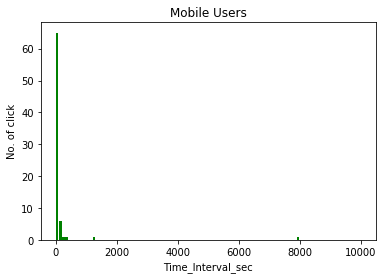

 The type of Plot_time_diff_Mobile_List

<class 'list'>
7915.878822
<class 'float'>
1.426813
<class 'float'>
183.119801
<class 'float'>
1.113689
<class 'float'>
1.145779
<class 'float'>
78.769534
<class 'float'>
0.834002
<class 'float'>
17.354692
<class 'float'>
1.224393
<class 'float'>
1272.599882
<class 'float'>
2.250149
<class 'float'>
14.931727
<class 'float'>
1.058676
<class 'float'>
0.965348
<class 'float'>
13.609698
<class 'float'>
0.83913
<class 'float'>
1.374386
<class 'float'>
12.660432
<class 'float'>
0.444395
<class 'float'>
6.368165
<class 'float'>
0.40413
<class 'float'>
13.88951
<class 'float'>
1.199771
<class 'float'>
44.636945
<class 'float'>
1.54285
<class 'float'>
13.199111
<class 'float'>
1.235715
<class 'float'>
1.583132
<class 'float'>
66.567142
<class 'float'>
1.254653
<class 'float'>
25.846516
<class 'float'>
1.895012
<class 'float'>
30.578278
<class 'float'>
2.272812
<class 'float'>
163.239569
<class 'float'>
1.16467
<class 'float'>
290.74286
<class 'float'>
1.

In [7]:
### Plot for Mobile Users ###

print("This is the list for plot\n")
print(Plot_time_diff_Mobile_List)

print("The length of the list for plot is : ")
print(len(Plot_time_diff_Mobile_List))

print("What is the max time_diff in Mobile User?\n")
print(max(Plot_time_diff_Mobile_List))   ####   7915.878822
print(min(Plot_time_diff_Mobile_List))   #### 0.40413
print(np.mean(Plot_time_diff_Mobile_List))   #### 150.69344390666666

range = (0,10000)
bins = 100

## Plotting a histogram

plt.hist(Plot_time_diff_Mobile_List, bins, range, color = 'green', histtype = 'bar', rwidth = 0.8)

# x-axis label
plt.xlabel('Time_Interval_sec')
# frequency label
plt.ylabel('No. of click')
# plot title
plt.title('Mobile Users')

# function to show the plot
plt.show()

### The threshold is 2000 sec #### --> We have to get rid of data which is more than 2000 sec
print(" The type of Plot_time_diff_Mobile_List\n")
print(type(Plot_time_diff_Mobile_List))   ### List

print(max(Plot_time_diff_Mobile_List))

### Make a New array ###
Th_Plot_time_diff_Mobile_List = []

for i,e in enumerate(Plot_time_diff_Mobile_List):
    if(e<=2000):  #### I'll just make the time_diff more than 2000 sec -> 0 sec
        print(type(e))
        print(e)
        Th_Plot_time_diff_Mobile_List.append(e)
        
print(len(Th_Plot_time_diff_Mobile_List))  ### 74  clicks (threshold was applied)
print(np.mean(Th_Plot_time_diff_Mobile_List))  #### 45.75850636486486 is the average time_diff for Mobile Users
        


This is the list for plot

[1.173089, 2061.937959, 1.204787, 22.218619, 0.828069, 0.552666, 5.825484, 0.365256, 38.329538, 0.534693, 78.253647, 0.376515, 13.955759, 0.372753, 1574.798747, 1.090489, 56.735448, 1.626761, 95.780872, 2.627601, 262.665457, 0.644739, 2.376323, 0.663405, 2.152791, 0.615208, 108.073361, 0.489294, 0.563819, 20.501577, 0.570832, 272.522048, 0.580795, 93.198081, 0.560817, 49.271883, 0.504057, 10.082238, 0.397338, 1307.506899, 0.348329, 16.68758, 0.915392, 42.618097, 0.668071, 6.712815, 0.718094, 0.834402, 28.434968, 1.115209, 0.298369, 0.917088, 46.944996, 0.765279, 143.704724, 0.816532, 98.771534, 0.770553, 17.926933, 0.730693, 629.703302, 1.060005, 54.19718, 1.31985, 19.367605, 0.842266, 40.805312, 1.328835, 4.464099, 1.113695, 364.336208, 1.162735, 1674.246971, 1.166667, 9721.834704, 0.977736, 0.856756, 3.572597, 0.533054, 1.032039, 21.124828, 0.772477, 511.419843, 0.919925, 3413.574759, 0.66447, 609.640356, 0.527245, 7.793918, 14.125585, 0.662263, 3.279544, 0

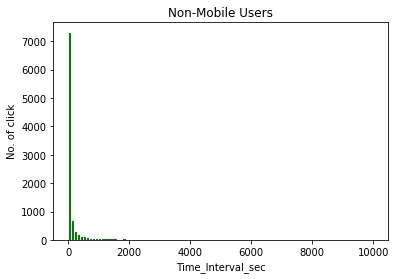

<class 'float'>
1.173089
<class 'float'>
1.204787
<class 'float'>
22.218619
<class 'float'>
0.828069
<class 'float'>
0.552666
<class 'float'>
5.825484
<class 'float'>
0.365256
<class 'float'>
38.329538
<class 'float'>
0.534693
<class 'float'>
78.253647
<class 'float'>
0.376515
<class 'float'>
13.955759
<class 'float'>
0.372753
<class 'float'>
1574.798747
<class 'float'>
1.090489
<class 'float'>
56.735448
<class 'float'>
1.626761
<class 'float'>
95.780872
<class 'float'>
2.627601
<class 'float'>
262.665457
<class 'float'>
0.644739
<class 'float'>
2.376323
<class 'float'>
0.663405
<class 'float'>
2.152791
<class 'float'>
0.615208
<class 'float'>
108.073361
<class 'float'>
0.489294
<class 'float'>
0.563819
<class 'float'>
20.501577
<class 'float'>
0.570832
<class 'float'>
272.522048
<class 'float'>
0.580795
<class 'float'>
93.198081
<class 'float'>
0.560817
<class 'float'>
49.271883
<class 'float'>
0.504057
<class 'float'>
10.082238
<class 'float'>
0.397338
<class 'float'>
1307.506899
<cl

<class 'float'>
483.116736
<class 'float'>
0.936724
<class 'float'>
70.085821
<class 'float'>
0.786082
<class 'float'>
130.120353
<class 'float'>
0.471194
<class 'float'>
143.197712
<class 'float'>
0.392189
<class 'float'>
6.832344
<class 'float'>
0.591292
<class 'float'>
36.26273
<class 'float'>
0.903508
<class 'float'>
31.381939
<class 'float'>
0.574951
<class 'float'>
32.548075
<class 'float'>
0.819736
<class 'float'>
636.702338
<class 'float'>
0.515951
<class 'float'>
365.445403
<class 'float'>
0.613204
<class 'float'>
40.08368
<class 'float'>
0.588726
<class 'float'>
15.10833
<class 'float'>
0.835678
<class 'float'>
8.799115
<class 'float'>
0.717515
<class 'float'>
9.656306
<class 'float'>
0.780286
<class 'float'>
15.658386
<class 'float'>
0.705609
<class 'float'>
142.734266
<class 'float'>
0.678713
<class 'float'>
132.066837
<class 'float'>
0.862103
<class 'float'>
630.259928
<class 'float'>
0.768333
<class 'float'>
104.816159
<class 'float'>
0.867146
<class 'float'>
122.050411
<

128.658854
<class 'float'>
4.005055
<class 'float'>
1032.135556
<class 'float'>
7.681073
<class 'float'>
0.363142
<class 'float'>
16.563624
<class 'float'>
0.368665
<class 'float'>
550.293711
<class 'float'>
0.619866
<class 'float'>
116.116884
<class 'float'>
0.524318
<class 'float'>
1.267594
<class 'float'>
0.851832
<class 'float'>
26.995744
<class 'float'>
0.562828
<class 'float'>
888.66043
<class 'float'>
0.799329
<class 'float'>
577.783386
<class 'float'>
0.624852
<class 'float'>
36.149834
<class 'float'>
0.519378
<class 'float'>
4.271667
<class 'float'>
0.373444
<class 'float'>
3.267875
<class 'float'>
0.328051
<class 'float'>
1.296283
<class 'float'>
1.239052
<class 'float'>
423.413388
<class 'float'>
1.591999
<class 'float'>
87.169862
<class 'float'>
1.412913
<class 'float'>
9.788445
<class 'float'>
1.711361
<class 'float'>
42.69128
<class 'float'>
0.838079
<class 'float'>
275.951009
<class 'float'>
0.875847
<class 'float'>
25.263747
<class 'float'>
0.587792
<class 'float'>
5.24

6.603526
<class 'float'>
0.372185
<class 'float'>
7.908128
<class 'float'>
0.499211
<class 'float'>
0.585661
<class 'float'>
32.110897
<class 'float'>
0.418368
<class 'float'>
26.536904
<class 'float'>
0.493277
<class 'float'>
0.826123
<class 'float'>
7.788116
<class 'float'>
0.632196
<class 'float'>
54.313266
<class 'float'>
0.763745
<class 'float'>
22.6996
<class 'float'>
0.613882
<class 'float'>
2.447204
<class 'float'>
0.590501
<class 'float'>
177.795666
<class 'float'>
1.308691
<class 'float'>
28.208733
<class 'float'>
0.73554
<class 'float'>
48.299691
<class 'float'>
0.808383
<class 'float'>
21.196213
<class 'float'>
0.870835
<class 'float'>
176.591853
<class 'float'>
0.824932
<class 'float'>
121.960829
<class 'float'>
0.879624
<class 'float'>
74.00018
<class 'float'>
0.822746
<class 'float'>
41.789293
<class 'float'>
0.771754
<class 'float'>
15.674023
<class 'float'>
1.066634
<class 'float'>
35.221608
<class 'float'>
0.808451
<class 'float'>
48.596852
<class 'float'>
0.842505
<c

<class 'float'>
2.766841
<class 'float'>
284.050476
<class 'float'>
1.645694
<class 'float'>
266.463293
<class 'float'>
1.841519
<class 'float'>
240.041342
<class 'float'>
1.708275
<class 'float'>
1141.418497
<class 'float'>
1.068766
<class 'float'>
52.652873
<class 'float'>
0.869061
<class 'float'>
105.213292
<class 'float'>
1.865644
<class 'float'>
427.778611
<class 'float'>
1.876672
<class 'float'>
178.15933
<class 'float'>
1.942115
<class 'float'>
326.495935
<class 'float'>
1.116179
<class 'float'>
30.179202
<class 'float'>
0.928958
<class 'float'>
138.891383
<class 'float'>
1.009877
<class 'float'>
584.77889
<class 'float'>
2.141091
<class 'float'>
1.744342
<class 'float'>
231.735806
<class 'float'>
1.953827
<class 'float'>
145.526103
<class 'float'>
1.849837
<class 'float'>
20.63137
<class 'float'>
1.262514
<class 'float'>
24.050514
<class 'float'>
0.708605
<class 'float'>
35.441335
<class 'float'>
0.72866
<class 'float'>
309.760309
<class 'float'>
1.856779
<class 'float'>
193.55

<class 'float'>
332.716597
<class 'float'>
0.678711
<class 'float'>
0.858176
<class 'float'>
95.036322
<class 'float'>
0.614127
<class 'float'>
0.40973
<class 'float'>
1819.491647
<class 'float'>
0.316827
<class 'float'>
0.654337
<class 'float'>
1578.136716
<class 'float'>
0.621945
<class 'float'>
787.036888
<class 'float'>
0.532294
<class 'float'>
0.979509
<class 'float'>
177.364145
<class 'float'>
0.8099
<class 'float'>
1549.555933
<class 'float'>
1.417486
<class 'float'>
75.978648
<class 'float'>
0.921362
<class 'float'>
929.995789
<class 'float'>
1.20457
<class 'float'>
841.451208
<class 'float'>
0.514135
<class 'float'>
576.410529
<class 'float'>
0.63689
<class 'float'>
1163.052893
<class 'float'>
220.616293
<class 'float'>
0.738236
<class 'float'>
300.427347
<class 'float'>
0.66286
<class 'float'>
1062.57552
<class 'float'>
0.773236
<class 'float'>
50.690853
<class 'float'>
0.651921
<class 'float'>
13.473494
<class 'float'>
0.772699
<class 'float'>
1041.383221
<class 'float'>
0.7

<class 'float'>
3.58599
<class 'float'>
1.625791
<class 'float'>
90.978509
<class 'float'>
78.162297
<class 'float'>
1.745097
<class 'float'>
21.101269
<class 'float'>
10.700806
<class 'float'>
43.068142
<class 'float'>
8.696511
<class 'float'>
45.530583
<class 'float'>
31.820665
<class 'float'>
22.446041
<class 'float'>
18.543025
<class 'float'>
2.483399
<class 'float'>
28.249715
<class 'float'>
15.167665
<class 'float'>
8.159482
<class 'float'>
12.333737
<class 'float'>
2.584142
<class 'float'>
90.393496
<class 'float'>
111.683704
<class 'float'>
456.103952
<class 'float'>
471.03846
<class 'float'>
373.921255
<class 'float'>
734.175309
<class 'float'>
33.313339
<class 'float'>
78.093997
<class 'float'>
121.198943
<class 'float'>
4.122256
<class 'float'>
44.853832
<class 'float'>
50.613005
<class 'float'>
12.860265
<class 'float'>
28.432467
<class 'float'>
17.570045
<class 'float'>
415.859807
<class 'float'>
145.178374
<class 'float'>
34.127231
<class 'float'>
93.158719
<class 'float'

0.546431
<class 'float'>
1.067892
<class 'float'>
20.003336
<class 'float'>
0.889835
<class 'float'>
22.994703
<class 'float'>
0.950461
<class 'float'>
903.642359
<class 'float'>
0.916199
<class 'float'>
30.256699
<class 'float'>
0.917336
<class 'float'>
1570.403372
<class 'float'>
1.2427
<class 'float'>
10.876921
<class 'float'>
0.792059
<class 'float'>
0.914354
<class 'float'>
55.784036
<class 'float'>
1.042925
<class 'float'>
41.714137
<class 'float'>
0.880629
<class 'float'>
13.703247
<class 'float'>
0.849249
<class 'float'>
66.074669
<class 'float'>
0.904957
<class 'float'>
84.947905
<class 'float'>
1.051654
<class 'float'>
20.971886
<class 'float'>
0.842564
<class 'float'>
1.37145
<class 'float'>
510.959683
<class 'float'>
1.359439
<class 'float'>
173.430647
<class 'float'>
1.311478
<class 'float'>
248.499886
<class 'float'>
1.521622
<class 'float'>
199.72034
<class 'float'>
1.980932
<class 'float'>
0.945582
<class 'float'>
8.523787
<class 'float'>
1.18564
<class 'float'>
1.49024

<class 'float'>
13.922744
<class 'float'>
0.326656
<class 'float'>
303.664674
<class 'float'>
0.394729
<class 'float'>
27.694858
<class 'float'>
0.426595
<class 'float'>
1201.455955
<class 'float'>
0.696318
<class 'float'>
42.851457
<class 'float'>
0.759749
<class 'float'>
1.470355
<class 'float'>
589.157412
<class 'float'>
1.119404
<class 'float'>
106.716049
<class 'float'>
0.660605
<class 'float'>
53.607423
<class 'float'>
1.206803
<class 'float'>
17.758391
<class 'float'>
0.82408
<class 'float'>
68.197737
<class 'float'>
1.031764
<class 'float'>
1.229715
<class 'float'>
0.765055
<class 'float'>
624.630401
<class 'float'>
0.660435
<class 'float'>
15.735376
<class 'float'>
0.478145
<class 'float'>
10.876693
<class 'float'>
0.442897
<class 'float'>
0.88844
<class 'float'>
0.500286
<class 'float'>
25.122918
<class 'float'>
1.094579
<class 'float'>
1.291813
<class 'float'>
50.089175
<class 'float'>
1.111609
<class 'float'>
47.575308
<class 'float'>
1.385048
<class 'float'>
501.284694
<cl

<class 'float'>
12.138401
<class 'float'>
0.528291
<class 'float'>
0.57691
<class 'float'>
0.764361
9039
96.79764953169598


In [8]:
### Plot for Non-Mobile users ###

### Plot for Mobile Users ###

print("This is the list for plot\n")
print(Plot_time_diff_Non_Mobile_List)

print("The length of the list for plot is : ")
print(len(Plot_time_diff_Non_Mobile_List))

print("What is the max time_diff in Mobile User?\n")
print(max(Plot_time_diff_Non_Mobile_List))   ####   9425804.363644
print(min(Plot_time_diff_Non_Mobile_List))   #### 0.007119
print(np.mean(Plot_time_diff_Non_Mobile_List))   #### 1543.8323356370306

range = (0,10000)
bins = 100

## Plotting a histogram

plt.hist(Plot_time_diff_Non_Mobile_List, bins, range, color = 'green', histtype = 'bar', rwidth = 0.8)

# x-axis label
plt.xlabel('Time_Interval_sec')
# frequency label
plt.ylabel('No. of click')
# plot title
plt.title('Non-Mobile Users')

# function to show the plot
plt.show()

### The threshold is 2000 sec #### --> We have to get rid of data which is more than 2000 sec

### Make a New array ###
Th_Plot_time_diff_Non_Mobile_List = []

for i,e in enumerate(Plot_time_diff_Non_Mobile_List):
    if(e<=2000):  #### I'll just make the time_diff more than 2000 sec -> 0 sec
        print(type(e))
        print(e)
        Th_Plot_time_diff_Non_Mobile_List.append(e)
        
print(len(Th_Plot_time_diff_Non_Mobile_List))  ### 9039 clicks (threshold was applied)
print(np.mean(Th_Plot_time_diff_Non_Mobile_List))  #### 96.79764953169598 is the average time_diff for Mobile Users



########### Overall Results ############
# 1. Without threshold(=2000 sec) 
#    1) Mobile Users : Average time_diff -> 75.38333333333334 sec
#    2) Non-Mobile Users : Average time_diff -> 661.9274545454546 sec  < eight or nine times >

# 2. With threshold(=2000 sec)
#    1) Mobile users : Average time_diff -> 45.758506364864864 sec
#    2) Non-Mobile Users : Average time_diff -> 96.79764953169598    <  Two times  >